In [1]:
from pylab import *
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas

In [2]:
%matplotlib inline

## Quick Rundown of Examlpes

## 1. Stock Price Log Return v. Exchange

In [3]:
# Coca-Cola stock for 01-Jan-2000 to 31-Dec-2009
df_KO = pandas.read_csv('work_data/table_KO.csv', index_col=False, header=0)
df_KO.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2009-12-31,57.580002,57.750000,56.930000,57.000000,10848800,24.040529
1,2009-12-30,57.740002,57.900002,57.480000,57.680000,9625200,24.327328
2,2009-12-29,57.450001,57.970001,57.450001,57.740002,9551000,24.352634
3,2009-12-28,57.410000,57.580002,57.279999,57.439999,7679600,24.226104
4,2009-12-24,57.490002,57.509998,57.049999,57.439999,5814200,24.226104


In [4]:
df_KO_close = df_KO[['Date', 'Close']]
df_KO_close.head()

,Date,Close
0,2009-12-31,57.000000
1,2009-12-30,57.680000
2,2009-12-29,57.740002
3,2009-12-28,57.439999
4,2009-12-24,57.439999


In [5]:
# calculate the log returns of each series as the natural log of the ratio of (price today/price yesterday)
returns_KO_log = log(df_KO['Close']/df_KO['Close'].shift(1))
returns_KO_log.head()

0         NaN
1    0.011859
2    0.001040
3   -0.005209
4    0.000000
Name: Close, dtype: float64

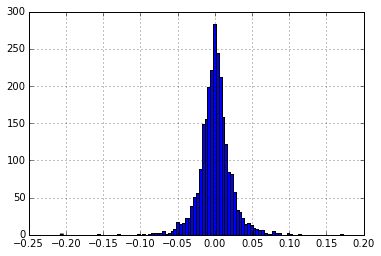

In [6]:
# generate a histogram of log returns of the stock
plt.figure()

returns_KO_log.diff().hist(bins=100)

In [7]:
# upload NYSE for 01-Jan-2000 to 31-Dec-2009
# with similar log transformations as above
df_NYSE = pandas.read_csv('work_data/table_NYSE.csv', index_col=False, header=0)
returns_NYSE_log = log(df_NYSE['Close']/df_NYSE['Close'].shift(1))
returns_NYSE_log.head()

0         NaN
1    0.007803
2    0.001511
3    0.001247
4   -0.000860
Name: Close, dtype: float64

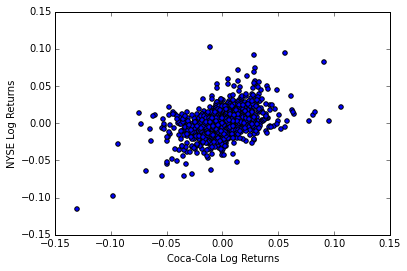

In [8]:
# generate a scatterplot that relates the log returns of stock to exchange
plt.scatter(returns_KO_log, returns_NYSE_log)
plt.xlabel("Coca-Cola Log Returns")
plt.ylabel("NYSE Log Returns")

## 2. Regress Summary Email Attribute Against Spam Label

In [9]:
# import Stata data to data frame
df_train = pandas.io.stata.read_stata('work_data/train.dta', convert_dates=True)
df_train.head()

,d,x1
0,1,0.805740
1,0,0.660912
2,0,0.549764
3,1,0.716941
4,1,0.254751


In [10]:
# summary statistics
df_train.describe()

,d,x1
count,1000.00000,1000.000000
mean,0.47700,0.487376
std,0.49972,0.283345
min,0.00000,0.000286
25%,0.00000,0.249382
50%,0.00000,0.484645
75%,1.00000,0.732494
max,1.00000,0.999006


In [11]:
import statsmodels.api as sm

In [12]:
model = sm.OLS(df_train['d'], df_train['x1'])
ols_result = model.fit()
print (ols_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      d   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     1857.
Date:                Wed, 23 Sep 2015   Prob (F-statistic):          4.06e-230
Time:                        17:52:54   Log-Likelihood:                -523.57
No. Observations:                1000   AIC:                             1049.
Df Residuals:                     999   BIC:                             1054.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.9880      0.023     43.096      0.0

In [13]:

m,b = polyfit(df_train['x1'],df_train['d'],1)
print 'm = ' + str(m) + '; and b = ' + str(b)

m = 1.01554222622; and b = -0.0179504831375


In [14]:
logit = sm.Logit(df_train['d'], df_train['x1'])
log_result = logit.fit()
print log_result.summary()

Optimization terminated successfully.
         Current function value: 0.661479
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      d   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      999
Method:                           MLE   Df Model:                            0
Date:                Wed, 23 Sep 2015   Pseudo R-squ.:                 0.04423
Time:                        17:52:54   Log-Likelihood:                -661.48
converged:                       True   LL-Null:                       -692.09
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.9199      0.119      7.726      0.000         0.687     1.153


In [15]:
label_test = df_train['x1']
spam_predict_ols = ols_result.predict(label_test)
spam_predict_log = log_result.predict(label_test)
spam_predict_ols, spam_predict_log

(array([  7.96077907e-01,   6.52986228e-01,   5.43170929e-01,
          7.08343446e-01,   2.51695752e-01,   8.84110332e-01,
          2.52738595e-01,   1.51903987e-01,   7.54569352e-01,
          1.48779854e-01,   9.67224479e-01,   4.70555156e-01,
          1.32998943e-01,   4.93817031e-01,   6.38561368e-01,
          5.41788995e-01,   5.75780332e-01,   3.87396127e-01,
          1.34099379e-01,   3.52603793e-01,   3.26711744e-01,
          1.69533312e-01,   5.71674071e-02,   2.86504656e-01,
          5.33915818e-01,   2.61976540e-01,   3.68067265e-01,
          8.19111407e-01,   7.63208270e-01,   2.08912924e-01,
          6.38485491e-01,   6.21959925e-01,   9.60464776e-01,
          5.55406749e-01,   2.06282020e-01,   1.50573313e-01,
          3.03044945e-01,   2.52217978e-01,   6.00618720e-01,
          7.47483492e-01,   3.37398589e-01,   6.02561533e-01,
          6.52767599e-01,   6.72402978e-01,   4.46870685e-01,
          9.09730420e-02,   5.86927593e-01,   6.99023247e-01,
        

In [16]:
threshold = np.arange(.05, 1, .05)
threshold

array([ 0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,  0.45,
        0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,  0.9 ,  0.95])

In [17]:
# test various thresholds against OLS for performance
for t in threshold:
    count_ols = 0
    for i in spam_predict_ols:
        if i > t:
            count_ols += 1
    print 'OLS Spam prediction count (threshold = %s): ' % str(t) + str(count_ols)

OLS Spam prediction count (threshold = 0.05): 952
OLS Spam prediction count (threshold = 0.1): 894
OLS Spam prediction count (threshold = 0.15): 852
OLS Spam prediction count (threshold = 0.2): 793
OLS Spam prediction count (threshold = 0.25): 746
OLS Spam prediction count (threshold = 0.3): 684
OLS Spam prediction count (threshold = 0.35): 624
OLS Spam prediction count (threshold = 0.4): 569
OLS Spam prediction count (threshold = 0.45): 525
OLS Spam prediction count (threshold = 0.5): 477
OLS Spam prediction count (threshold = 0.55): 426
OLS Spam prediction count (threshold = 0.6): 377
OLS Spam prediction count (threshold = 0.65): 320
OLS Spam prediction count (threshold = 0.7): 271
OLS Spam prediction count (threshold = 0.75): 214
OLS Spam prediction count (threshold = 0.8): 169
OLS Spam prediction count (threshold = 0.85): 123
OLS Spam prediction count (threshold = 0.9): 82
OLS Spam prediction count (threshold = 0.95): 30


In [18]:
# test various thresholds against LOG for performance
for t in threshold:
    count_log = 0
    for i in spam_predict_log:
        if i > t:
            count_log += 1
    print 'LOG Spam prediction count (threshold = %s): ' % str(t) + str(count_log)

LOG Spam prediction count (threshold = 0.05): 1000
LOG Spam prediction count (threshold = 0.1): 1000
LOG Spam prediction count (threshold = 0.15): 1000
LOG Spam prediction count (threshold = 0.2): 1000
LOG Spam prediction count (threshold = 0.25): 1000
LOG Spam prediction count (threshold = 0.3): 1000
LOG Spam prediction count (threshold = 0.35): 1000
LOG Spam prediction count (threshold = 0.4): 1000
LOG Spam prediction count (threshold = 0.45): 1000
LOG Spam prediction count (threshold = 0.5): 1000
LOG Spam prediction count (threshold = 0.55): 778
LOG Spam prediction count (threshold = 0.6): 538
LOG Spam prediction count (threshold = 0.65): 307
LOG Spam prediction count (threshold = 0.7): 67
LOG Spam prediction count (threshold = 0.75): 0
LOG Spam prediction count (threshold = 0.8): 0
LOG Spam prediction count (threshold = 0.85): 0
LOG Spam prediction count (threshold = 0.9): 0
LOG Spam prediction count (threshold = 0.95): 0


In [19]:
# labeled spam count
len(df_train[(df_train['d'] == 1)])

477

## 3. Markov Transition Matrices

In [20]:
MT_a = np.matrix('.5, .5, 0; .25, .5, .25; 0, .5, .5')
MT_a

matrix([[ 0.5 ,  0.5 ,  0.  ],
        [ 0.25,  0.5 ,  0.25],
        [ 0.  ,  0.5 ,  0.5 ]])

In [21]:
steps_a = [2, 5, 10, 25]

for i in steps_a:
    print '%s steps ahead' % str(i)
    print MT_a ** i
    print ''

2 steps ahead
[[ 0.375  0.5    0.125]
 [ 0.25   0.5    0.25 ]
 [ 0.125  0.5    0.375]]

5 steps ahead
[[ 0.265625  0.5       0.234375]
 [ 0.25      0.5       0.25    ]
 [ 0.234375  0.5       0.265625]]

10 steps ahead
[[ 0.25048828  0.5         0.24951172]
 [ 0.25        0.5         0.25      ]
 [ 0.24951172  0.5         0.25048828]]

25 steps ahead
[[ 0.25000001  0.5         0.24999999]
 [ 0.25        0.5         0.25      ]
 [ 0.24999999  0.5         0.25000001]]



In [22]:
# 'absorbing states'

MT_b = np.matrix('1, 0, 0; .25, .5, .25; 0, 0, 1')
MT_b

matrix([[ 1.  ,  0.  ,  0.  ],
        [ 0.25,  0.5 ,  0.25],
        [ 0.  ,  0.  ,  1.  ]])

In [23]:
steps_b = [2, 5, 10, 25]

for i in steps_b:
    print '%s steps ahead' % str(i)
    print MT_b ** i
    print ''

2 steps ahead
[[ 1.     0.     0.   ]
 [ 0.375  0.25   0.375]
 [ 0.     0.     1.   ]]

5 steps ahead
[[ 1.        0.        0.      ]
 [ 0.484375  0.03125   0.484375]
 [ 0.        0.        1.      ]]

10 steps ahead
[[  1.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  4.99511719e-01   9.76562500e-04   4.99511719e-01]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]

25 steps ahead
[[  1.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  4.99999985e-01   2.98023224e-08   4.99999985e-01]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]



## 4. National Longitudinal Survey of Women; Union Prediction

In [24]:
# using 'pu' as shorthand for 'prior_union'

df_pu = pandas.io.stata.read_stata('work_data/union_pred.dta', convert_dates=True)
df_pu.head()

,idcode,year,age,grade,south,union,black,smsa,prior_union
0,1,87,35,12,0,1,1,1,1
1,1,83,31,12,0,1,1,1,1
2,1,77,25,12,0,0,1,1,1
3,1,88,37,12,0,1,1,1,0
4,1,85,33,12,0,1,1,1,1


In [25]:
grouped = df_pu.groupby(['union', 'prior_union'])
grouped.count()

idcode   year    age  grade  south  black   smsa
union prior_union                                                  
0     0             14758  14758  14758  14758  14758  14758  14758
      1              2110   2110   2110   2110   2110   2110   2110
1     0              2086   2086   2086   2086   2086   2086   2086
      1              2812   2812   2812   2812   2812   2812   2812

In [26]:
logit_1 = sm.Logit(df_pu['union'], df_pu[['year', 'age', 'grade', 'south', 'black', 'smsa', 'prior_union']])
logres_1 = logit_1.fit()
print '\tUnion - Logit\n\n', logres_1.summary()

Optimization terminated successfully.
         Current function value: 0.435559
         Iterations 6
	Union - Logit

                           Logit Regression Results                           
Dep. Variable:                  union   No. Observations:                21766
Model:                          Logit   Df Residuals:                    21759
Method:                           MLE   Df Model:                            6
Date:                Wed, 23 Sep 2015   Pseudo R-squ.:                  0.1831
Time:                        17:52:56   Log-Likelihood:                -9480.4
converged:                       True   LL-Null:                       -11606.
                                        LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
year           -0.0488      0.002    -21.051      0.000        -0.053    -0.044
age       

In [27]:
# copy dataframe and manipulate Prior Union

# set 'prior union' to zero for all records
df_pu2 = df_pu
df_pu2['prior_union'] = 0.00000000000001

# train logit on new input
logit_2 = sm.Logit(df_pu2['union'], df_pu2[['year', 'age', 'grade', 'south', 'black', 'smsa', 'prior_union']])
logres_2 = logit_2.fit()
df_pu2['pred01'] = logres_2.predict()
df_pu2['pred00'] = 1 - df_pu2['pred01']

# set 'prior union' to one for all records
df_pu2 = df_pu
df_pu2['prior_union'] = 1

# train logit on new input
logit_2 = sm.Logit(df_pu2['union'], df_pu2[['year', 'age', 'grade', 'south', 'black', 'smsa', 'prior_union']])
logres_2 = logit_2.fit()
df_pu2['pred11'] = logres_2.predict()
df_pu2['pred10'] = 1 - df_pu2['pred11']

df_pu2.describe()

         Current function value: 0.510644
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.510309
         Iterations 6


C:\Anaconda\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


,idcode,year,age,grade,south,union,black,smsa,prior_union,pred01,pred00,pred11,pred10
count,21766.000000,21766.000000,21766.000000,21766.000000,21766.000000,21766.000000,21766.000000,21766.000000,21766,21766.000000,21766.000000,21766.000000,21766.000000
mean,2616.485712,79.569466,30.553800,12.776532,0.416843,0.225030,0.275292,0.715152,1,0.225535,0.774465,0.225030,0.774970
std,1484.960374,5.920549,6.436752,2.395196,0.493048,0.417612,0.446671,0.451333,0,0.090102,0.090102,0.089509,0.089509
min,1.000000,70.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.058972,0.432364,0.053393,0.437941
25%,1347.000000,73.000000,25.000000,12.000000,0.000000,0.000000,0.000000,0.000000,1,0.166898,0.734211,0.166592,0.736399
50%,2623.000000,80.000000,31.000000,12.000000,0.000000,0.000000,0.000000,1.000000,1,0.223226,0.776774,0.222119,0.777881
75%,3898.000000,85.000000,36.000000,14.000000,1.000000,0.000000,1.000000,1.000000,1,0.265789,0.833102,0.263601,0.833408
max,5159.000000,88.000000,46.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1,0.567636,0.941028,0.562059,0.946607


In [28]:
# get mean values for union/non-union predictions
df_pu2['pred00'].mean(), df_pu2['pred01'].mean(), df_pu2['pred10'].mean(), df_pu2['pred11'].mean()

(0.7744646411972244,
 0.2255353588027823,
 0.774970136910774,
 0.22502986308922202)

In [29]:
# generated a modelbased Markov matrix of transition probabilities
MT_pu = np.matrix('0.7744646411972244,0.2255353588027823;0.774970136910774,0.22502986308922202')
MT_pu

matrix([[ 0.77446464,  0.22553536],
        [ 0.77497014,  0.22502986]])

In [30]:
# long-term the majority of women will NOT be in unions, regardless of their
# prior union membership
MT_pu ** 100

matrix([[ 0.77457859,  0.22542141],
        [ 0.77457859,  0.22542141]])

## 5. Gaussian White Noise

In [31]:
noise1 = np.random.normal(0,1,1000)
noise2 = np.random.normal(0,2,1000)
noise4 = np.random.normal(0,4,1000)

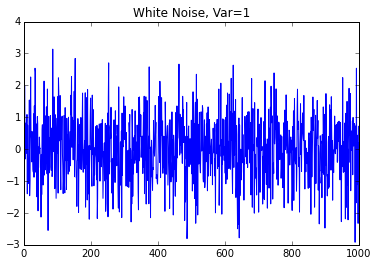

In [32]:
# example of first plot

plt.plot(noise1)
plt.title('White Noise, Var=1')

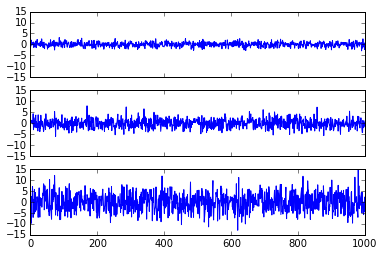

In [33]:
# the three plots sharing axes

fig, axs = plt.subplots(3, 1, sharex=True, sharey=True)
axs[0].plot(noise1)
axs[1].plot(noise2)
axs[2].plot(noise4)

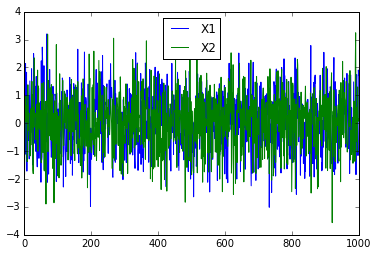

In [34]:
X1 = np.random.normal(0,1,1000)
X2 = np.random.normal(0,1,1000)

plt.plot(X1, label='X1')
plt.plot(X2, label='X2')
legend(loc='best')

0.0156311873234


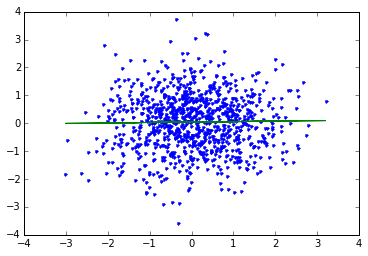

In [35]:
# scatter plot of same inputs with fitted line

m, b = np.polyfit(X1, X2, 1)

plt.plot(X1, X2, '.')
plt.plot(X1, m*X1 + b, '-')

print m

## 6. Independent Random Walks

In [36]:
Walk1 = np.random.normal(0,1,1000)
Walk1 = np.cumsum(Walk1)
Walk2 = np.random.normal(0,1,1000)
Walk2 = np.cumsum(Walk2)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     123.4
Date:                Wed, 23 Sep 2015   Prob (F-statistic):           4.07e-27
Time:                        17:52:59   Log-Likelihood:                -4183.9
No. Observations:                1000   AIC:                             8370.
Df Residuals:                     999   BIC:                             8375.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.3731      0.034     11.109      0.0

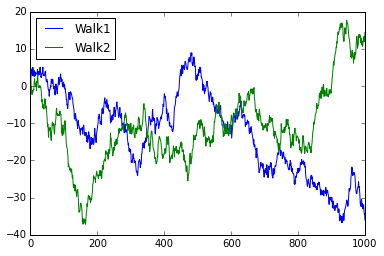

In [37]:
plt.plot(Walk1, label='Walk1')
plt.plot(Walk2, label='Walk2')
plt.legend(loc='best')

model = sm.OLS(Walk1, Walk2)
results = model.fit()
print (results.summary())

## 7. Monte Carlo Simulation

(array([  2.,   1.,   2.,   0.,   3.,   2.,   3.,   2.,   3.,   7.,   3.,
          3.,   6.,  15.,  15.,  14.,  26.,  15.,  24.,  34.,  53.,  42.,
         72.,  60.,  58.,  71.,  66.,  59.,  56.,  55.,  39.,  29.,  41.,
         23.,  18.,  16.,  16.,  11.,   9.,   5.,   3.,   8.,   4.,   1.,
          1.,   2.,   0.,   1.,   0.,   1.]),
 array([-2.28017129, -2.1907548 , -2.10133832, -2.01192183, -1.92250534,
        -1.83308885, -1.74367236, -1.65425587, -1.56483938, -1.47542289,
        -1.38600641, -1.29658992, -1.20717343, -1.11775694, -1.02834045,
        -0.93892396, -0.84950747, -0.76009098, -0.6706745 , -0.58125801,
        -0.49184152, -0.40242503, -0.31300854, -0.22359205, -0.13417556,
        -0.04475907,  0.04465741,  0.1340739 ,  0.22349039,  0.31290688,
         0.40232337,  0.49173986,  0.58115635,  0.67057284,  0.75998932,
         0.84940581,  0.9388223 ,  1.02823879,  1.11765528,  1.20707177,
         1.29648826,  1.38590475,  1.47532123,  1.56473772,  1.65415421,
 

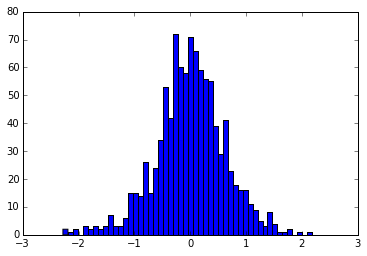

In [38]:
Monte_count = range(1000)
Monte_coef = []

for i in Monte_count:
    Walk1 = np.random.normal(0,1,1000)
    Walk1 = np.cumsum(Walk1)
    Walk2 = np.random.normal(0,1,1000)
    Walk2 = np.cumsum(Walk2)
    
    m, b = np.polyfit(Walk1, Walk2, 1)
    Monte_coef.append(m)

# print len(Monte_coef)
plt.hist(Monte_coef, bins=50)